In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


/home/liuchao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


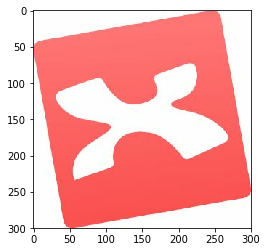

[[[0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  ...
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]]

 [[0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  ...
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]]

 [[0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  ...
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]]

 ...

 [[0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  ...
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]]

 [[0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  [0.9960785 0.9960785 0.9960785]
  ...
  [0.9960785 0.9960785 0.9960785]
  [0

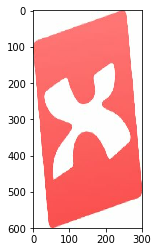

In [30]:
image_raw_data = tf.gfile.FastGFile('xmind.jpeg', 'rb').read()
sess = tf.InteractiveSession()
# 将图片解码为张量, 无需再用np.array
img_data = tf.image.decode_jpeg(image_raw_data)
# img_data = img_data/255
print(img_data.eval())
plt.imshow(img_data.eval())
plt.show()
# 将矩阵张量编码为图片
# encoded_image = tf.image.encode_jpeg(img_data, )
# with tf.gfile.GFile('encoded_image.jpeg', 'wb') as f:
#     f.write(encoded_image.eval())
# 将0-255(uint8)的像素值转化为(0.0-1.0)范围内的实数
img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
print(img_data.eval())
# 尺寸变化
resized = tf.image.resize_images(img_data, [600, 300], method=0)
plt.imshow(resized.eval())
plt.show()

In [31]:
# 将图片标准化（均值0, 方差1）
# img_data = tf.clip_by_value(img_data, 0.0, 1.0)
adjusted = tf.image.per_image_standardization(img_data)
plt.imshow(adjusted.eval())
plt.show()
# todo: error

ValueError: Floating point image RGB values must be in the 0..1 range.

In [33]:
img_data.eval().shape

(300, 300, 3)

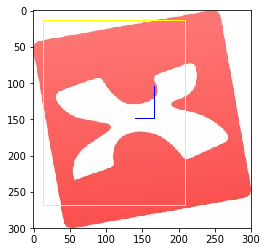

In [37]:
# 处理标注框
# tf.image.draw_bounding_box函数图像的输入是一个batch的数据，即四维矩阵，所以应将解码后的图像加一维
batched = tf.expand_dims(img_data, 0)
# 一个标注框有四个数字 [y_min, x_min, y_max, x_max](相对坐标)
boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]]) # 三维矩阵
result = tf.image.draw_bounding_boxes(batched, boxes)
plt.imshow(result.eval()[0])
plt.show()

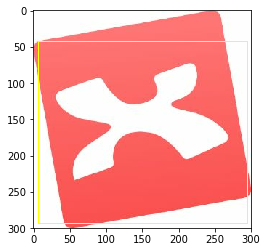

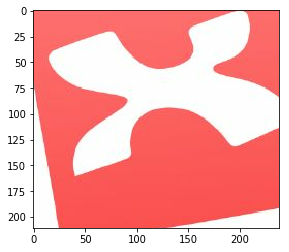

In [57]:
# 随机截取有信息含量的区域, 可以通过标注框来指明哪部分是有“信息含量”的
# min_object_covered表明随机截取的部分占标注框的最小比例
boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7]]])
begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
tf.shape(img_data), bounding_boxes=boxes, min_object_covered=0.5)
batched = tf.expand_dims(img_data, 0)
image_with_box = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
# 随机截取的标注框部分图像
distorted_image = tf.slice(img_data, begin, size)
plt.figure(0)
plt.imshow(image_with_box.eval()[0])
plt.figure(1)
plt.imshow(distorted_image.eval())
plt.show()